# Banking: Credit Card Default

### Collecting a Datasets

#### Datset
- https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset?select=UCI_Credit_Card.csv
- https://www.kaggle.com/code/muskanbhasin/credit-card-default-prediction

#### Original Datasets
- https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#
- https://archive.ics.uci.edu/ml/machine-learning-databases/00350/

### Content
##### There are 25 variables:

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

In [1]:
import os
dataset = "D:\\iNeuron\internship_projects\\Credit Card Default Prediction"
file_name = "UCI_Credit_Card.csv"
cwd = os.getcwd()

file_path = os.path.join(cwd,dataset,file_name)

In [2]:
# !pip install opendatasets
# !pip install seaborn

## importing Lib and packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
df1 = pd.read_csv(file_path)
df1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
df1.columns.tolist()

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default.payment.next.month']

In [6]:
df1.rename(mapper={'default.payment.next.month':"default"},axis=1,inplace=True)

In [7]:
df1.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [8]:
AMOUNT_BILL = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',]
AMOUTN_PRE_PAY = [ 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5','PAY_AMT6',]
REPAYMENT_STATUS = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [9]:
# df1['avg_amount_bill'] =df1['BILL_AMT1']+df1['BILL_AMT2']+df1['BILL_AMT3']+df1['BILL_AMT4']+df1['BILL_AMT5']+df1[BILL_AMT6']
                                                                                                                 
df1['avg_amount_bill'] = round((df1['BILL_AMT1']+df1['BILL_AMT2']+df1['BILL_AMT3']+df1['BILL_AMT4']+df1['BILL_AMT5']+df1['BILL_AMT6'])/6,4)                        
df1['total_amount_bill'] = round((df1['BILL_AMT1']+df1['BILL_AMT2']+df1['BILL_AMT3']+df1['BILL_AMT4']+df1['BILL_AMT5']+df1['BILL_AMT6']),4)  

In [10]:
'avg_amount_pay'
'total_amount_pay'
df1['avg_amount_pay'] = round((df1['PAY_AMT1']+df1['PAY_AMT2']+df1['PAY_AMT3']+df1['PAY_AMT4']+df1['PAY_AMT5']+df1['PAY_AMT6'])/6,4)

df1['total_amount_pay'] = round((df1['PAY_AMT1']+df1['PAY_AMT2']+df1['PAY_AMT3']+df1['PAY_AMT4']+df1['PAY_AMT5']+df1['PAY_AMT6']),4)  

In [11]:
df1['repayment_status'] = round((df1['PAY_0']+df1['PAY_2']+df1['PAY_3']+df1['PAY_4']+df1['PAY_5']+df1['PAY_6']),4)

In [12]:
df1

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,avg_amount_bill,total_amount_bill,avg_amount_pay,total_amount_pay,repayment_status
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,1,1284.0000,7704.0,114.8333,689.0,-2
1,2,120000.0,2,2,2,26,-1,2,0,0,...,1000.0,1000.0,0.0,2000.0,1,2846.1667,17077.0,833.3333,5000.0,3
2,3,90000.0,2,2,2,34,0,0,0,0,...,1000.0,1000.0,1000.0,5000.0,0,16942.1667,101653.0,1836.3333,11018.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,1200.0,1100.0,1069.0,1000.0,0,38555.6667,231334.0,1398.0000,8388.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,10000.0,9000.0,689.0,679.0,0,18223.1667,109339.0,9841.5000,59049.0,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,5003.0,3047.0,5000.0,1000.0,0,120891.5000,725349.0,7091.6667,42550.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8998.0,129.0,0.0,0.0,0,3530.3333,21182.0,2415.0000,14490.0,-4
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,22000.0,4200.0,2000.0,3100.0,1,11749.3333,70496.0,5216.6667,31300.0,8
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,1178.0,1926.0,52964.0,1804.0,1,44435.1667,266611.0,24530.1667,147181.0,-1


In [14]:
plt.figure(figsize=(12,6))
# sns.countplot(x='avg_amount_bill',hue='default',data=df1)
plt.show()

<Figure size 864x432 with 0 Axes>

<BarContainer object of 30000 artists>

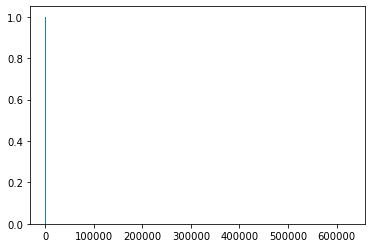

In [22]:
# plt.plot('avg_amount_bill','default',data=df1,kind='bar')
plt.bar(x='avg_amount_pay',height='default',data=df1)

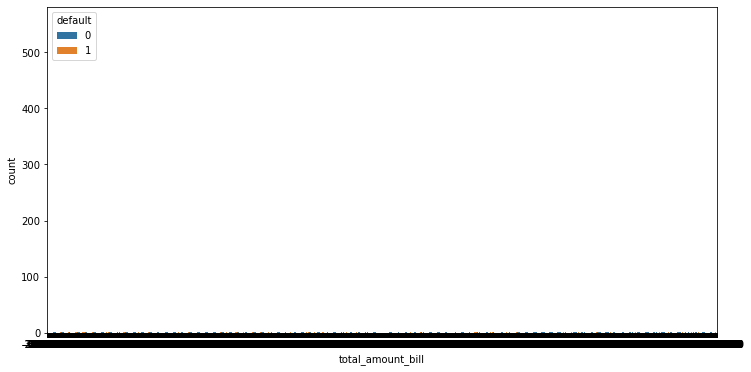

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(x='total_amount_bill',hue='default',data=df1)
plt.show()

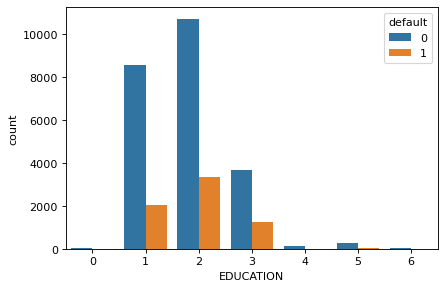

In [24]:
plt.figure(dpi=80)
sns.countplot(x="EDUCATION",hue="default", data=df1)
plt.show()

In [27]:
plt.figure(figsize=(12,6))
# sns.countplot(x='default',hue='avg_amount_pay',data=df1)
plt.show()

<Figure size 864x432 with 0 Axes>

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x="total_amount_pay",hue='default',data=df1)
plt.show()

In [ ]:
# "total_amount_bill" "avg_amount_pay" "total_amount_pay"